In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop



#Load data into pandas dataframe
df = pd.read_csv('data.csv')
df = df.drop(df.columns[0], 1)

#Separate class label
X = df[df.columns[:-1]].copy()
y = df[df.columns[-1]].copy()

#Replace binary flags with 0 and 1
X['CODE_GENDER'] = X['CODE_GENDER'].replace({'M' : 0, 'F' : 1})
X['FLAG_OWN_CAR'] = X['FLAG_OWN_CAR'].replace({'Y' : 0, 'N' : 1})
X['FLAG_OWN_REALTY'] = X['FLAG_OWN_REALTY'].replace({'Y' : 0, 'N' : 1})

#One-hot encode categorical variables
income_onehot = pd.get_dummies(X['NAME_INCOME_TYPE'], prefix='Income')
education_onehot = pd.get_dummies(X['NAME_EDUCATION_TYPE'], prefix='Education')
family_onehot = pd.get_dummies(X['NAME_FAMILY_STATUS'], prefix='Family')
housing_onehot = pd.get_dummies(X['NAME_HOUSING_TYPE'], prefix='Housing')
occasion_onehot = pd.get_dummies(X['OCCUPATION_TYPE'], prefix='Occupation')

X = X.join(income_onehot)
X = X.join(education_onehot)
X = X.join(family_onehot)
X = X.join(housing_onehot)
X = X.join(occasion_onehot)

#Drop original categorical variables
X = X.drop('NAME_INCOME_TYPE', 1)
X = X.drop('NAME_EDUCATION_TYPE', 1)
X = X.drop('NAME_FAMILY_STATUS', 1)
X = X.drop('NAME_HOUSING_TYPE', 1)
X = X.drop('OCCUPATION_TYPE', 1)

X = X.astype('float64')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002635F964E80>],
      dtype=object)

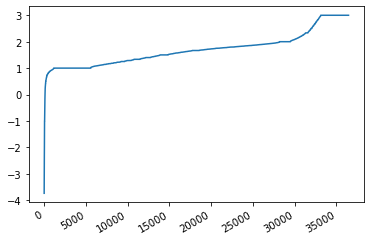

In [178]:
y_sorted = y.sort_values().reset_index(drop=True)
y_sorted.plot.line(subplots=True)

In [197]:
#Split data into test and train
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.30)

model = Sequential()

#Hidden Layer 1
model.add(Dense(12, input_dim=X_train.shape[1], activation= 'relu', kernel_initializer="glorot_normal"))

#Hidden Layer 2
model.add(Dense(6, input_dim=X_train.shape[1], activation= 'relu', kernel_initializer="glorot_normal"))

#Output Layer
model.add(Dense(1, activation= 'linear'))

opt = SGD()

model.compile(loss="mean_squared_error", optimizer = opt, metrics=['mean_squared_error'])
metrics = model.fit(X_train, y_train,
                    batch_size=100,
                    epochs=200,
                    validation_data=(X_test, y_test))

#Retest on the test data for metrics
y_pred = model.predict(X).reshape(1, -1)[0]

Train on 25519 samples, validate on 10938 samples
Epoch 1/200
25519/25519 [==============================] - 1s 29us/sample - loss: 0.5504 - mean_squared_error: 0.5504 - val_loss: 0.3942 - val_mean_squared_error: 0.3942
Epoch 2/200
25519/25519 [==============================] - 1s 21us/sample - loss: 0.3791 - mean_squared_error: 0.3791 - val_loss: 0.3866 - val_mean_squared_error: 0.3866
Epoch 3/200
25519/25519 [==============================] - 1s 22us/sample - loss: 0.3748 - mean_squared_error: 0.3748 - val_loss: 0.3844 - val_mean_squared_error: 0.3844
Epoch 4/200
25519/25519 [==============================] - 1s 22us/sample - loss: 0.3728 - mean_squared_error: 0.3728 - val_loss: 0.3828 - val_mean_squared_error: 0.3828
Epoch 5/200
25519/25519 [==============================] - 1s 23us/sample - loss: 0.3713 - mean_squared_error: 0.3713 - val_loss: 0.3808 - val_mean_squared_error: 0.3808
Epoch 6/200
25519/25519 [==============================] - 1s 22us/sample - loss: 0.3704 - mean_squa

Epoch 49/200
25519/25519 [==============================] - 1s 21us/sample - loss: 0.3605 - mean_squared_error: 0.3605 - val_loss: 0.3718 - val_mean_squared_error: 0.3718
Epoch 50/200
25519/25519 [==============================] - 1s 22us/sample - loss: 0.3603 - mean_squared_error: 0.3603 - val_loss: 0.3722 - val_mean_squared_error: 0.3722
Epoch 51/200
25519/25519 [==============================] - 1s 21us/sample - loss: 0.3602 - mean_squared_error: 0.3602 - val_loss: 0.3720 - val_mean_squared_error: 0.3720
Epoch 52/200
25519/25519 [==============================] - 1s 21us/sample - loss: 0.3603 - mean_squared_error: 0.3603 - val_loss: 0.3721 - val_mean_squared_error: 0.3721
Epoch 53/200
25519/25519 [==============================] - 1s 21us/sample - loss: 0.3602 - mean_squared_error: 0.3602 - val_loss: 0.3718 - val_mean_squared_error: 0.3718
Epoch 54/200
25519/25519 [==============================] - 1s 22us/sample - loss: 0.3602 - mean_squared_error: 0.3602 - val_loss: 0.3724 - val_m

Epoch 97/200
25519/25519 [==============================] - 1s 22us/sample - loss: 0.3586 - mean_squared_error: 0.3586 - val_loss: 0.3708 - val_mean_squared_error: 0.3708
Epoch 98/200
25519/25519 [==============================] - 1s 21us/sample - loss: 0.3586 - mean_squared_error: 0.3586 - val_loss: 0.3712 - val_mean_squared_error: 0.3712
Epoch 99/200
25519/25519 [==============================] - 1s 21us/sample - loss: 0.3586 - mean_squared_error: 0.3586 - val_loss: 0.3707 - val_mean_squared_error: 0.3707
Epoch 100/200
25519/25519 [==============================] - 1s 21us/sample - loss: 0.3586 - mean_squared_error: 0.3586 - val_loss: 0.3707 - val_mean_squared_error: 0.3707
Epoch 101/200
25519/25519 [==============================] - 1s 22us/sample - loss: 0.3585 - mean_squared_error: 0.3585 - val_loss: 0.3709 - val_mean_squared_error: 0.3709
Epoch 102/200
25519/25519 [==============================] - 1s 21us/sample - loss: 0.3585 - mean_squared_error: 0.3585 - val_loss: 0.3707 - va

25519/25519 [==============================] - 1s 21us/sample - loss: 0.3573 - mean_squared_error: 0.3573 - val_loss: 0.3702 - val_mean_squared_error: 0.3702
Epoch 145/200
25519/25519 [==============================] - 1s 21us/sample - loss: 0.3573 - mean_squared_error: 0.3573 - val_loss: 0.3707 - val_mean_squared_error: 0.3707
Epoch 146/200
25519/25519 [==============================] - 1s 21us/sample - loss: 0.3573 - mean_squared_error: 0.3573 - val_loss: 0.3708 - val_mean_squared_error: 0.3708
Epoch 147/200
25519/25519 [==============================] - 1s 22us/sample - loss: 0.3573 - mean_squared_error: 0.3573 - val_loss: 0.3703 - val_mean_squared_error: 0.3703
Epoch 148/200
25519/25519 [==============================] - 1s 21us/sample - loss: 0.3572 - mean_squared_error: 0.3572 - val_loss: 0.3703 - val_mean_squared_error: 0.3703
Epoch 149/200
25519/25519 [==============================] - 1s 21us/sample - loss: 0.3573 - mean_squared_error: 0.3573 - val_loss: 0.3704 - val_mean_squa

Epoch 192/200
25519/25519 [==============================] - 1s 21us/sample - loss: 0.3559 - mean_squared_error: 0.3559 - val_loss: 0.3698 - val_mean_squared_error: 0.3698
Epoch 193/200
25519/25519 [==============================] - 1s 22us/sample - loss: 0.3559 - mean_squared_error: 0.3559 - val_loss: 0.3703 - val_mean_squared_error: 0.3703
Epoch 194/200
25519/25519 [==============================] - 1s 21us/sample - loss: 0.3559 - mean_squared_error: 0.3559 - val_loss: 0.3700 - val_mean_squared_error: 0.3700
Epoch 195/200
25519/25519 [==============================] - 1s 21us/sample - loss: 0.3559 - mean_squared_error: 0.3559 - val_loss: 0.3701 - val_mean_squared_error: 0.3701
Epoch 196/200
25519/25519 [==============================] - 1s 21us/sample - loss: 0.3557 - mean_squared_error: 0.3557 - val_loss: 0.3697 - val_mean_squared_error: 0.3697
Epoch 197/200
25519/25519 [==============================] - 1s 21us/sample - loss: 0.3558 - mean_squared_error: 0.3558 - val_loss: 0.3709 -

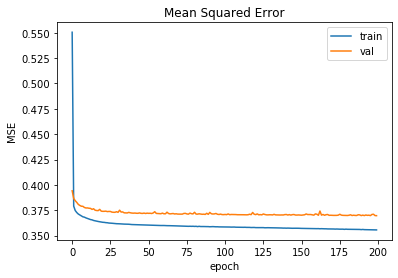

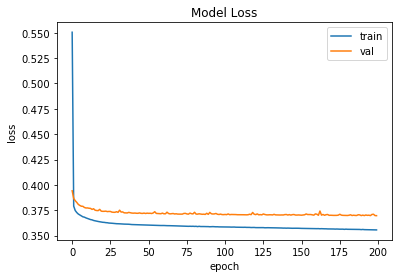

In [198]:
#Model Accuracy Plot
plt.subplot(1, 1, 1)
plt.plot(metrics.history['mean_squared_error'])
plt.plot(metrics.history['val_mean_squared_error'])
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

#Model Loss Plot
plt.subplot(1, 1, 1)
plt.plot(metrics.history['loss'])
plt.plot(metrics.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [199]:
#Get Metrics
y_true = y.to_numpy()

MSE = mean_squared_error(y_true, y_pred)
MAE = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("Mean Squared Error:", MSE)
print("Mean Absolute Error:", MAE)
print("R^2 Score: ", r2)

Mean Squared Error: 0.35956980973251595
Mean Absolute Error: 0.440763372921567
R^2 Score:  0.04799280521592819


In [200]:
print(y_pred.max())
print(y_pred.min())

2.2936184
1.134135
